In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
from leicaexperiment import Experiment
from leicaexperiment.experiment import attributes, attribute
from skimage import io, filters, morphology
import numpy as np

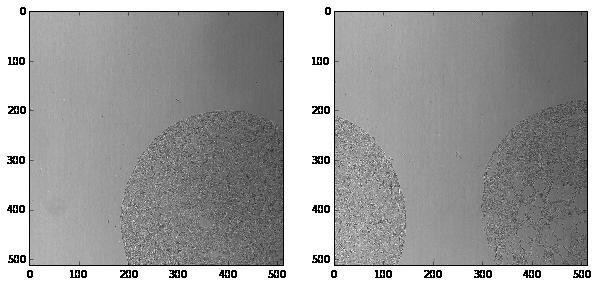

In [8]:
e = Experiment('data/experiment--2015_03_21_17_09_56 kopi')
p1 = next(img for img in e.images if attribute(img, 'x') == 0 and attribute(img, 'y') == 0)
p2 = next(img for img in e.images if attribute(img, 'x') == 1 and attribute(img, 'y') == 0)
img1 = io.imread(p1)
img2 = io.imread(p2)
plt.figure(figsize=(10,5))
plt.subplot(121)
io.imshow(img1)
plt.subplot(122)
io.imshow(img2);

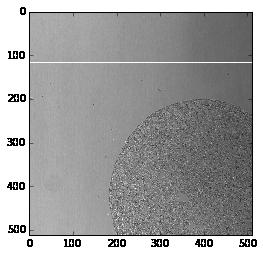

In [11]:
line_variance = np.var(img1, axis=0)
np.argmin(line_variance)
img1[118-1:118+1, :] = 255
io.imshow(img1);

/Users/arve/.virtualenvs/3.4/lib/python3.4/site-packages/scikit_image-0.11dev-py3.4-macosx-10.9-x86_64.egg/skimage/io/_plugins/matplotlib_plugin.py:69: UserWarning: Non-standard image type; displaying image with stretched contrast.
  warnings.warn("Non-standard image type; displaying image with "


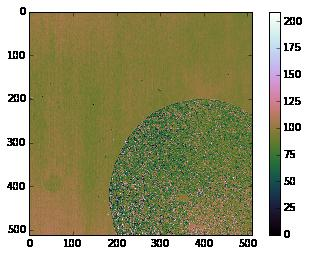

In [16]:
smooth = filters.rank.median(img1, selem)
equalized = np.copy(img1.astype(np.int))
equalized -= smooth[118,:]
equalized -= equalized.min()
io.imshow(equalized);

In [17]:
def find_smooth_line(filenames):
    "Look through image files to find an image with an smooth line. Returns the smooth line."
    for f in filenames:
        img = io.imread(f)

        # remove noise
        selem = morphology.square(51)
        smooth = filters.rank.median(img, selem)
        
        line_variance = np.var(smooth, axis=0)
        if line_variance.min() < 5:
            # found smooth line
            line_number = np.argmin(line_variance)
            return smooth[line_number,:]

In [42]:
def remove_intensity_variation(filename, intensity_profile):
    "Subtracts intensity_profile from image file, to reduce intensity variation."
    img = io.imread(filename).astype(np.int)

    img -= intensity_profile
    # scale to uint8
    img -= img.min()
    # clip values above 255 to avoid intensity scaling
    img[img > 255] = 255

    io.imsave(filename, img.astype(np.uint8))

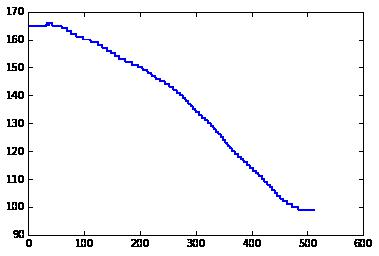

In [19]:
intensity_profile = find_smooth_line(e.images)
plt.plot(intensity_profile)

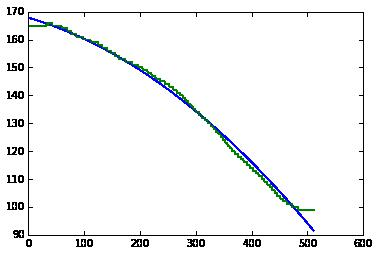

In [36]:
# use curve fit to avoid mirror effect
from scipy.optimize import curve_fit

def line(x,a,b,c):
    return a*x**2+b*x+c

x = np.arange(512)
options, covariance = curve_fit(line, x, intensity_profile)
a,b,c = options

y = a*x**2+b*x+c
plt.plot(y)
plt.plot(intensity_profile)

In [40]:
from joblib import Parallel, delayed

In [ ]:
Parallel(n_jobs=4)(delayed(remove_intensity_variation)(i, y) for i in e.images);

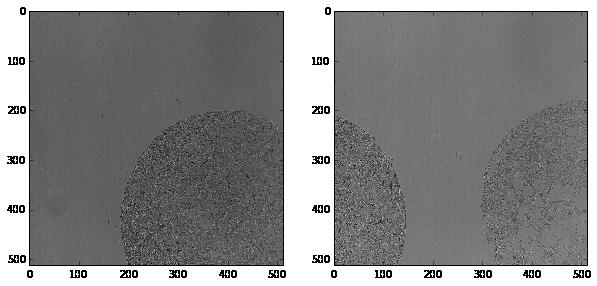

In [44]:
img1 = io.imread(p1)
img2 = io.imread(p2)
plt.figure(figsize=(10,5))
plt.subplot(121)
io.imshow(img1)
plt.subplot(122)
io.imshow(img2);

In [45]:
e.stitch()

['/Users/arve/Dokumenter/git/master/data/experiment--2015_03_21_17_09_56 kopi/stitched--U00--V00--C00--Z00.png']

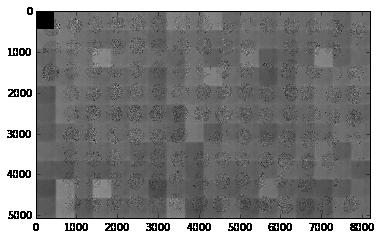

In [47]:
io.imshow(e.stitched[0])

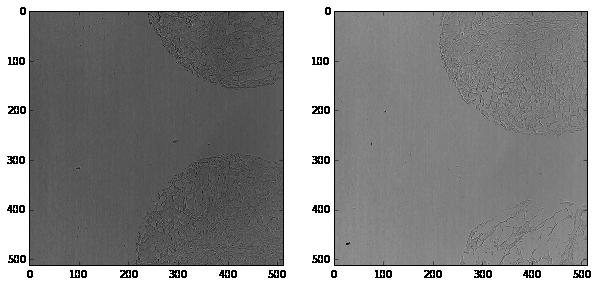

In [48]:
p1 = next(img for img in e.images if attribute(img, 'x') == 1 and attribute(img, 'y') == 8)
p2 = next(img for img in e.images if attribute(img, 'x') == 1 and attribute(img, 'y') == 9)
img1 = io.imread(p1)
img2 = io.imread(p2)
plt.figure(figsize=(10,5))
plt.subplot(121)
io.imshow(img1)
plt.subplot(122)
io.imshow(img2);

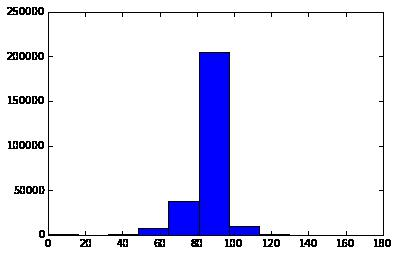

In [51]:
plt.hist(img1.flatten());

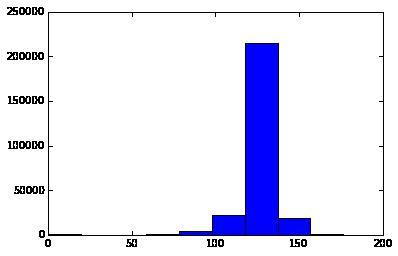

In [53]:
plt.hist(img2.flatten());

clip below 0 to avoid intensity change

In [54]:
def remove_intensity_variation(filename, intensity_profile):
    "Subtracts intensity_profile from image file, to reduce intensity variation."
    img = io.imread(filename).astype(np.int)

    img -= intensity_profile
    # clip values to avoid overflows
    img[img < 0] = 0
    img[img > 255] = 255

    io.imsave(filename, img.astype(np.uint8))

In [55]:
!rm -r data/experiment--2015_03_21_17_09_56\ kopi
!cp -r data/experiment--2015_03_21_17_09_56 "data/experiment--2015_03_21_17_09_56 kopi"

In [57]:
Parallel(n_jobs=4)(delayed(remove_intensity_variation)(i, y) for i in e.images);

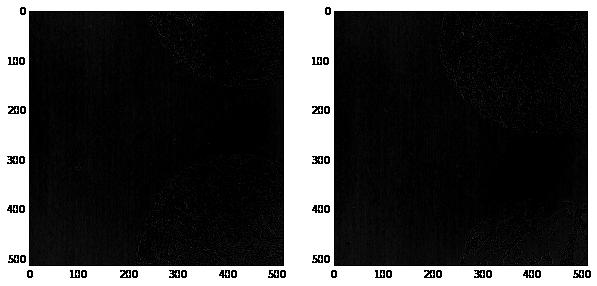

In [58]:
p1 = next(img for img in e.images if attribute(img, 'x') == 1 and attribute(img, 'y') == 8)
p2 = next(img for img in e.images if attribute(img, 'x') == 1 and attribute(img, 'y') == 9)
img1 = io.imread(p1)
img2 = io.imread(p2)
plt.figure(figsize=(10,5))
plt.subplot(121)
io.imshow(img1)
plt.subplot(122)
io.imshow(img2);

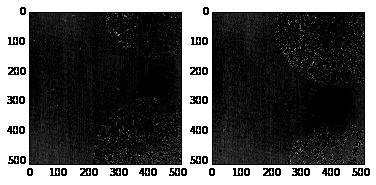

In [61]:
img1 *= 255/img1.max()
img2 *= 255/img2.max()
plt.subplot(121)
io.imshow(img1)
plt.subplot(122)
io.imshow(img2);

adjust the subtracted line

In [62]:
!rm -r data/experiment--2015_03_21_17_09_56\ kopi
!cp -r data/experiment--2015_03_21_17_09_56 "data/experiment--2015_03_21_17_09_56 kopi"

In [64]:
img1 = io.imread(p1)

In [67]:
(img1-y).min()

-84.361324581469574

In [68]:
Parallel(n_jobs=4)(delayed(remove_intensity_variation)(i, y-84) for i in e.images);

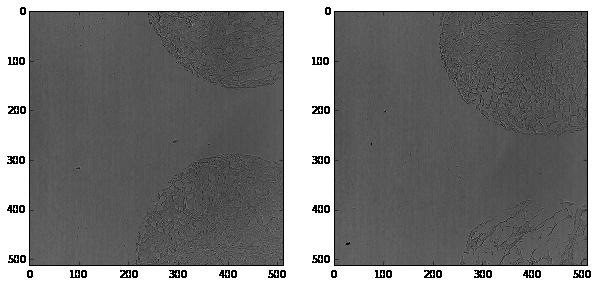

In [69]:
p1 = next(img for img in e.images if attribute(img, 'x') == 1 and attribute(img, 'y') == 8)
p2 = next(img for img in e.images if attribute(img, 'x') == 1 and attribute(img, 'y') == 9)
img1 = io.imread(p1)
img2 = io.imread(p2)
plt.figure(figsize=(10,5))
plt.subplot(121)
io.imshow(img1)
plt.subplot(122)
io.imshow(img2);

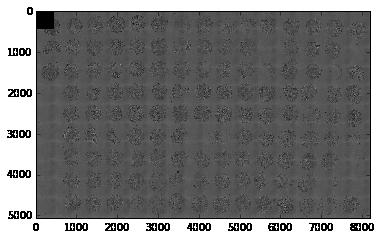

In [70]:
io.imshow(e.stitch()[0])